<a href="https://colab.research.google.com/github/Rocio206/ADA-Informes/blob/main/Optimal_BST_Informe_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Descripcion del problema**
El arbol binario de busqueda (BST) es una estructura de datos no lineal que se utiliza en muchas aplicaciones cientificas para reducir el tiempo de busqueda. En un BST, el hijo izquierdo es el elemento mas pequeño y el hijo derecho el el mayor elemento. Esta disposición siplifica el procedimento de busqueda.

El **árbol binario de busqueda optimo (OBST)** extiende esta idea, aplicando la **probabilidad o frecuencia de busqueda** del elemento como prioridad al ordenar. De modo que **los elementos buscados con mas frecuencia se almacenan mas cerca de la raiz.**


**Entrada**: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen **claves ficticias $d_i$** que representan **búsquedas fallidas** con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: Construir un **árbol de búsqueda óptimo**, es decir, un árbol que **minimice la cantidad esperada de nodos visitados (costo esperado)**.

#**2. Descripcion del algoritmo**

El objetivo es contruir un arbol que minimice el costo total de busqueda. No pretende conseguir un altura minima y tampoco es necasario que el padre del subarbol sea mayor que sus hijos.

Considere la secuencia de $n$ claves $K = [ k_1, k_2, k_3, …, k_n]$ de distinta probabilidad en orden ordenado tal que $k_1< k_2< … < k_n $. Los elementos entre cada par de claves conducen a una **búsqueda fallida**, por lo que para $n$ claves, el árbol de búsqueda binaria contiene $n + 1$ claves ficticias $d_i$, que representan búsquedas fallidas.

El coste corresponde al promedio de nodos que se debe visitar en una búsqueda. El coste de cada clave tiene directa relación con su nivel en el árbol.

**Coste por busqueda para un nodo $i$ esta dado por**: 

>$cost(k_i) = depth(k_i)+1$
 
**Y el coste de la busqueda en un BST (funcion que buscamos minimizar) se define:**  

>$\sum\limits_{i=1}^n (depth(k_i)+1)p_i$



***Ejemplo:***
Las valores de las claves y sus frecuencias:

**Keys = [10, 12, 20]**

**Frecuencia = [34, 8, 50]**

> **Estos serian algunos de los posibles BST para esta secuencia de valores:**

![image](https://www.tutorialspoint.com/assets/questions/media/9929/bst.jpg)



*   **Caso 1**, el coste es: $(34*1) + (8*2) + (50*3) = 200$

*   **Caso 2**, el coste es:$(8*1) + (34*2) + (50*2) = 176$

*   **Caso 3**, el coste es:$(50*1) + (8*2) + (34*3) = 168$

*   **Caso 4**, el coste es:$(34*1) + (50*2) + (8*3) = 158$

*   **Caso 5**, el coste es:$(50*1) + (34*2) + (8*3) = 142$ ***(minimo)***


##3. Implementación solucion recurciva


In [ ]:
from math import inf

def optBST(p, f, i, j, rc):
  rc+=1
  if j < i :
    return 0, rc
  if j == i:
    return f[i] , rc
  
  fsum = 0
  for k in range(i,j+1):
    fsum += f[k]
  
  min = inf

  for r in range(i,j+1):
    min_1 , rc= optBST(p, f,i, r-1, rc)
    min_2 , rc=  optBST(p, f, r+1, j, rc)
    
    cost = min_1 + min_2
    if cost < min:
      min = cost
  return min + fsum, rc

#ejemplo<
print("Entrada:")
print("Las valores de las claves y sus frecuencias.")
keys = [10, 12, 20]
freq = [34, 8, 50]
print("Keys =", keys)
print("Frecuencia =", freq,"\n")

n = len(keys)
min, r = optBST(keys, freq,0, n-1,-1)
print("Salida:")
print("Costo minimo del BST es ", min)
print("Se realizaron", r , "recurciones")

Entrada:
Las valores de las claves y sus frecuencias.
Keys = [10, 12, 20]
Frecuencia = [34, 8, 50] 

Salida:
Costo minimo del BST es  142
Se realizaron 14 recurciones


## Implementacion solucion por Programacion dinamica (Bottom-up)

In [ ]:
from math import inf

def BST_bottomUp(p, f, n):

  cost = [[0 for x in range(n)] for y in range(n)]


  for c in range(0, n):
    cost[c][c]= f[c]

  for L in range(2, n+1):
    for i in range(n - L +1):
      j = i + L - 1

      cost[i][j] = inf
      
      for r in range(i, j+1):
        c = 0
        if r > i: c+= cost[i][r-1]

        if r < j: c+= cost[r+1][j]

        fsum = 0
        for k in range(i, j+1):
          fsum += f[k]

        c+= fsum
        if c < cost[i][j]: cost[i][j] = c

  return cost[0][n-1]

#Ejemplo
keys = [69, 10, 12, 20, 10]
freq = [0.25, 0.20, 0.05, 0.20, 0.30]

n = len(keys)
print("Cost of Optimal BST is", BST_bottomUp(keys, freq, n))

Cost of Optimal BST is 2.1


`visualize=True`

Entrada:
Keys = [10, 12, 20]
Frecuencia = [34, 8, 50] 

Salida:
Costo minimo del  OBST es  142
Se realizaron 14 recurciones


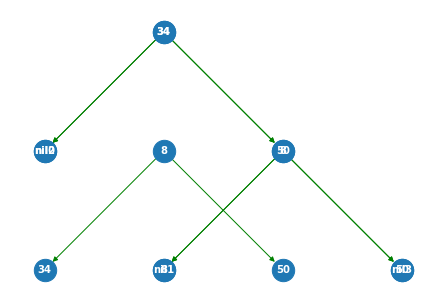

In [ ]:
from math import inf
import random  
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

def optBST(p, f, i, j, rc, visualize=True):
  rc+=1

  if j < i :
    return 0, rc
  if j == i:
    return f[i] , rc
  
  fsum = 0
  for k in range(i,j+1):
    fsum += f[k]
  
  min = inf

  for r in range(i,j+1):
    min_1 , rc= optBST(p, f,i, r-1, rc)
    min_2 , rc=  optBST(p, f, r+1, j, rc)
    
    cost = min_1 + min_2
    if cost < min:
      if visualize==True or verbose==True:
      min = cost

  if visualize==True:
    G = nx.DiGraph()

  
  return min + fsum, rc

#ejemplo<
print("Entrada:")
keys = [10, 12, 20]
freq = [34, 8, 50]
print("Keys =", keys)
print("Frecuencia =", freq,"\n")

n = len(keys)
min, r = optBST(keys, freq,0, n-1,-1)
print("Salida:")
print("Costo minimo del  OBST es ", min)
print("Se realizaron", r , "recurciones")

In [ ]:
from math import inf

def BST_bottomUp(p, f, n):

  cost = [[0 for x in range(n)] for y in range(n)]
  root = [[0 for x in range(n)] for y in range(n)]

  for c in range(0, n):
    cost[c][c]= f[c]

  for L in range(2, n+1):
    for i in range(n - L +1):
      j = i + L - 1

      cost[i][j] = inf
      
      for r in range(i, j+1):
        c = 0
        if r > i: c+= cost[i][r-1]

        if r < j: c+= cost[r+1][j]

        fsum = 0
        for k in range(i, j+1):
          fsum += f[k]

        c+= fsum
        if c < cost[i][j]:
          cost[i][j] = c
          root[i][j] = r

  print(root)
  rec
  print(cost)

  return cost[0][n-1]

#Ejemplo
keys = [10, 12, 20]
freq = [34, 8, 50]

n = len(keys)
print("Cost of Optimal BST is", BST_bottomUp(keys, freq, n))

[[0, 0, 2], [0, 0, 2], [0, 0, 0]]
[[34, 50, 142], [0, 8, 66], [0, 0, 50]]
Cost of Optimal BST is 142


###**Subestructura optima**

1. **Definicion de los subproblemas:** Sea $1 \leq i \leq j \leq n$, y T cualquier BST en $i,...,j$. definimos el coste de T:

> $C(T) = \sum\limits_{l=i}^j (depth_T(l)+1)p_i$

y los subproblemas 

> $C_{ij} = min(C(T))$

el tiempo esperado de busqueda para un BST optimo es $C_{ln}$


2.  **Funcion de recurencia**: Sunpongamos que la raiz de $T$ en $i,...,j$ es $k$. El costo de $T$ es:

$C(T) = \sum\limits_{l=i}^j (depth_T(l)+1)p_l$

$= \sum\limits_{l=i}^k-1 (depth_{Tl}(l)+1 +1)p_l + p_k +\sum\limits_{l=k+1}^j (depth_{Tr}(l)+1+1)p_l$
 
$ = C(T_l) + C(T_r) + \sum\limits_{l=i}^k-1 p_l$

y asi definimos la **funcion de recurrencia** $C'_{ij}$:

$C'_{ij}= \begin{cases}
  min_{i \leq k \leq j}(C'_{i,k-1} C'_{k+1,j}) \sum\limits_{l=i}^j p_l &\text{ si  } i < j \\
  p_i &\text{ si } i = j \\
  0 &\text{ si } i > j
\end{cases}$



Tenemos que si G es un arbol de busqueda optimo, entonces los subarboles a la izquierda y derecha de la raiz deben ser arboles de busqueda optimos de $(p_1,...,p_{r-1})$ y $(p_{r+1},...,p_n)$ respetivamente. La prueba de esto es que si no lo fueran, entonces G no seria un arbol de busqueda optimo en primer lugar.

Para cada posible raiz $p_r$ para $i \leq  r \leq j$, crea un subarbol optimo para $(p_1,...,p_{r-1}$ y $(p_{r+1},...,p_n)$ y selecciona la raiz con el mejor resultado.

Minimizando todas las opciones posibles para la raíz, obtenemos el
siguiente relación de recurrencia.

> Sea $c[i,j] = cost(p_i,...,p_j)$ entonces:

$c[i,j] =(\sum\limits_{k=i}^j p_k) + min(c[i,r-1] + c[r+1,j])$ ; con $i \leq r\leq j$, 
donde $c[i,i-1] = c[j+1,j] = 0$ es el costo de un subarbol vacio.

**Correctitud**

> $c[i,j] = c'[i,j]$

Prueba por induccion en $j-i$. El casos base es trivial.

Caso inductivo: $c[i,j] \leq c'[i,j]$. sea $c'[i,j]$ es el costo de un BST en $i,...j$ y $c[i,j]$ el costo para un BST optimo.

###**Correctitud algoritmo bottom-up**


#4. Analisis del tiempo de ejecucion



####**Solucion Bottom-up (programacion dinamica):**

Tiempo de ejecucion

En la solución por acercaminto bottom-up, se creamos un tabla de tamaño $n*n$ para guardar las soluciones de los subproblemas que iremos resolviendo:

> 

El 







